<a href="https://colab.research.google.com/github/innovateDotAI/ReadyToUseModels/blob/main/ImageClassification_Alg%3DXceptionNetwork_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification using Xception model
Ref. link [Image classification from scratch](https://keras.io/examples/vision/image_classification_from_scratch/)

In [ ]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [ ]:
!pip install tensorflow==2.11.*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Not uninstalling tensorflow-estimator at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-d445c365-eab0-4499-985a-f21ee3a0e422
    Can't uninstall 'tensorflow-estimator'. No files were found to uninstall.
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Not uninstalling keras at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-d445c365-eab0-4499-985a-f21ee3a0e422
    Can't uninstall 'keras'. No files were foun

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
# Load raw data
# !rm -fr kagglecatsanddogs_5340.zip
# !rm -fr PetImages
# !rm -fr readme[1].txt
# !rm -fr CDLA-Permissive-2.0.pdf
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
!unzip -qo kagglecatsanddogs_5340.zip
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  34.1M      0  0:00:23  0:00:23 --:--:-- 33.5M
 CDLA-Permissive-2.0.pdf   eventlogs		        preload_class.lst
 PetImages		   hadoop_accessed_config.lst  'readme[1].txt'
 azure			   kagglecatsanddogs_5340.zip
 conf			   logs


In [ ]:
!ls PetImages

Cat  Dog


**Filter out corrupted images**

In [ ]:
import os
import PIL
from PIL import Image

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    #print(folder_path)
    for fname in os.listdir(folder_path):
      fpath = os.path.join(folder_path,fname)
      #print(fpath)
      try:
        # img = PIL.Image.open(fpath)
        # # fetching the dimensions
        # wid, hgt = img.size
        # # displaying the dimensions
        # print(str(wid) + "x" + str(hgt))
        fobj = open(fpath, "rb")
        is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        #print(is_jfif)
      finally:
        fobj.close()
      if is_jfif is False:
        num_skipped += 1
        os.remove(fpath)
print("No. of currupted file deleted:",num_skipped)
      

No. of currupted file deleted: 1590


**Trim the dataset to fit compute enviornment**

In [ ]:
# data_size = 320 # No. of Images in each folder
# for folder_name in ("Cat", "Dog"):
#     folder_path = os.path.join("PetImages", folder_name)
#     #print(folder_path)
#     count=0
#     for fname in os.listdir(folder_path):
#       fpath = os.path.join(folder_path,fname)
#       #print(fpath)
#       count+=1
#       if count >= data_size:
#         os.remove(fpath)

In [ ]:
!ls -ltr PetImages/Dog

total 421676
-rw-r--r-- 1 root root    24887 Feb 10  2017 10005.jpg
-rw-r--r-- 1 root root    43924 Feb 10  2017 10004.jpg
-rw-r--r-- 1 root root    73597 Feb 10  2017 10003.jpg
-rw-r--r-- 1 root root    19881 Feb 10  2017 10002.jpg
-rw-r--r-- 1 root root    40947 Feb 10  2017 10001.jpg
-rw-r--r-- 1 root root    20176 Feb 10  2017 10000.jpg
-rw-r--r-- 1 root root    24358 Feb 10  2017 1000.jpg
-rw-r--r-- 1 root root    24746 Feb 10  2017 100.jpg
-rw-r--r-- 1 root root    26799 Feb 10  2017 1.jpg
-rw-r--r-- 1 root root    34448 Feb 10  2017 0.jpg
-rw-r--r-- 1 root root    24715 Feb 10  2017 10051.jpg
-rw-r--r-- 1 root root    20124 Feb 10  2017 10050.jpg
-rw-r--r-- 1 root root    42200 Feb 10  2017 1005.jpg
-rw-r--r-- 1 root root    42311 Feb 10  2017 10049.jpg
-rw-r--r-- 1 root root    34203 Feb 10  2017 10048.jpg
-rw-r--r-- 1 root root     7304 Feb 10  2017 10047.jpg
-rw-r--r-- 1 root root    28797 Feb 10  2017 10046.jpg
-rw-r--r-- 1 root root    34034 Feb 10  2017 10045.jpg
-rw-r--r-

**Generate a Training and Validation Dataset**

In [ ]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


**Configure the dataset for performance**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


**Visualize the data**

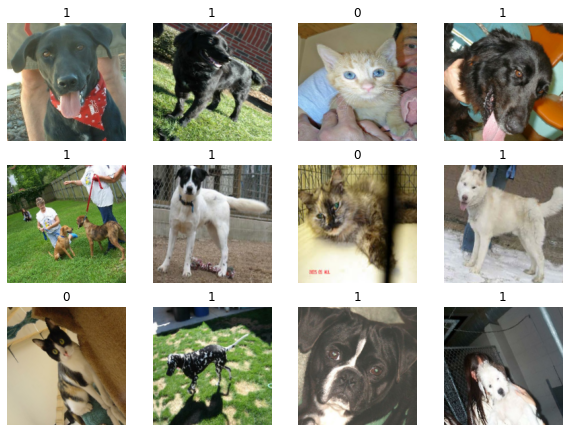

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # take function take batches. here one means 1st batch only. if 2 then 1st and 2nd batch.
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

**Build a model based on small version of the Xception network**

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


**Train the model**

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
146/147 [============================>.] - ETA: 0s - loss: 0.649

*** WARNING: max output size exceeded, skipping output. ***

1/1 [==============================] - 0s 455ms/step
Out[14]: <keras.callbacks.History at 0x7f7d7652d100>

**Run inference on new data**

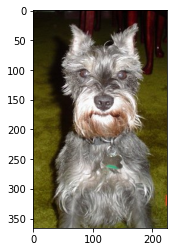

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
image = mpimg.imread("PetImages/Dog/10005.jpg")
plt.imshow(image)
plt.show()

In [ ]:
img = keras.preprocessing.image.load_img(
    "PetImages/Dog/10005.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

1/1 [==============================] - 0s 166ms/step
This image is 0.00% cat and 100.00% dog.


In [ ]:
eval_result = model.evaluate(val_ds)

37/37 [==============================] - 4s 109ms/step - loss: 0.2693 - accuracy: 0.9131
